<a href="https://colab.research.google.com/github/comparativechrono/Principles-of-Data-Science/blob/main/Week_6/Section_10_Python_Example__Implementing_Simulations_with_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 10 - Python example: implementing simulations with NumPy

Simulations are a powerful tool in the data scientist's toolkit, offering a way to model complex systems and predict their behaviour under various scenarios. Monte Carlo simulations, which use random sampling to make statistical predictions, are particularly useful for their versatility and ease of implementation. This section provides a Python example of how to implement a simulation using NumPy, focusing on a financial application: estimating the potential return on investment (ROI) under uncertainty.

1. Setting Up the Environment:

Ensure you have Python and NumPy installed, as NumPy provides the random number generation and array handling capabilities essential for efficient simulations:

In [27]:
pip install numpy matplotlib

2. Importing Required Libraries:

NumPy is essential for numerical operations, and we'll use it extensively in this example. We'll use matplotlib for plotting:

In [28]:
import numpy as np
import matplotlib.pyplot as plt

3. Defining the Simulation Parameters:

For this example, let's consider a simplified investment scenario where the annual return is uncertain. We'll simulate different potential annual return rates, which follow a normal distribution, to estimate the possible outcomes of the investment over a certain period:

In [29]:
# Set the simulation parameters
initial_investment = 10000 # Initial investment amount in dollars
mean_return = 0.07 # Average expected return 7%
std_dev_return = 0.1 # Standard deviation of the return
years = 10  # Duration of the investment in years
num_simulations = 1000 # Number of simulations to run

4. Running the Simulation:

We will simulate the investment returns over the specified period using a Monte Carlo simulation to generate random samples from the normal distribution of returns:

In [30]:
# Create an array to store simulation results
final_returns = np.zeros(num_simulations)
# Run simulations
for i in range(num_simulations):
    # Randomly sample returns for each year
    annual_returns = np.random.normal(mean_return, std_dev_return, years)
    # Calculate the compound return after the investment period
    compound_return = np.prod(1 + annual_returns)
    # Store the final return in the array
    final_returns[i] = initial_investment * compound_return
# Calculate the mean ending value from all simulations
mean_final_return = np.mean(final_returns)
print(f"Mean Final Return after {years} years: ${mean_final_return:.2f}")

Mean Final Return after 10 years: $19422.32


5. Analyzing the Simulation Results:

To better understand the range of possible outcomes, it's helpful to visualize the distribution of the final investment values:

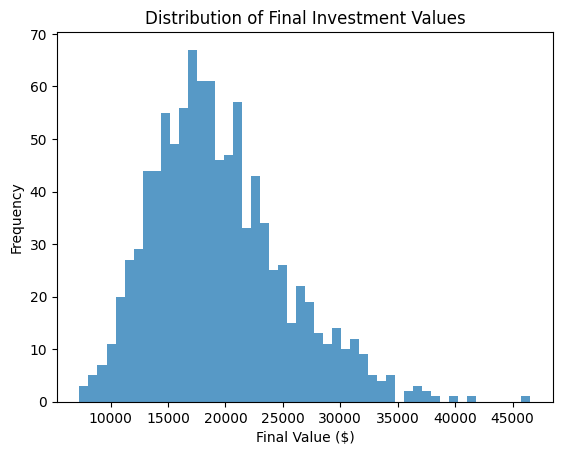

In [31]:
# Plotting the distribution of final returns
plt.hist(final_returns, bins=50, alpha=0.75)
plt.title('Distribution of Final Investment Values')
plt.xlabel('Final Value ($)')
plt.ylabel('Frequency')
plt.show()

6. Advanced Techniques:

For more robust analysis, we could consider applying variance reduction techniques or increasing the number of simulations. Parallel processing can be utilized to enhance performance when running a very high number of simulations.

## Using Dask for Parallel Monte Carlo Simulations

Parallelizing the Monte Carlo simulation can significantly speed up the computation, especially when running a large number of simulations. Dask is an excellent tool for parallelizing computations, especially for large-scale datasets and complex computational tasks like Monte Carlo simulations. Dask works well with NumPy, Pandas, and other Python scientific libraries by extending their capabilities with parallelism. It's particularly useful for tasks that need to scale beyond a single CPU or require handling data that doesn't fit into memory.

Here's how we can use Dask to parallelize the Monte Carlo simulation described in the previous example:

1. Setting Up Dask:

To use Dask for parallel processing, you first need to install Dask if it's not already installed. You might also want to install dask[distributed] to use the Dask distributed scheduler, which can handle larger computations more efficiently:

In [32]:
pip install dask[distributed]

2. Importing Required Libraries:

Import Dask and its array functionality, which is similar to NumPy but can operate in a parallel and distributed manner:

In [33]:
import dask.array as da
from dask.distributed import Client

3. Setting Up Dask Client:

Set up a Dask client, which provides a dashboard to monitor the computation:

In [34]:
client = Client() # Starts a local Dask client on your machine

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44683 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34697
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:44683/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43799'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33471'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:36189', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36189
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:50622
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42145', name: 1, status: init, memory:

4. Defining the Simulation with Dask:

You can parallelize the simulation using Dask by creating a Dask array of delayed execution tasks. This allows Dask to manage memory and compute scheduling optimally:

In [35]:
def simulate_investment_return_dask():
    initial_investment = 10000
    mean_return = 0.07
    std_dev_return = 0.1
    years = 10

    # Dask's random function can generate random numbers in parallel
    annual_returns = da.random.normal(mean_return, std_dev_return, years)

    # Calculate the compound return after the investment period
    compound_return = da.prod(1 + annual_returns)

    final_return = initial_investment * compound_return
    return final_return

# Number of simulations
num_simulations = 1000

# Generate many simulations as delayed objects
results = [simulate_investment_return_dask() for _ in range(num_simulations)]

# Use Dask to compute results in parallel
final_returns = da.compute(*results)


5. Analyzing the Results:

The results returned from Dask computations can be analyzed just like NumPy arrays, using similar code to calculate statistics and generate plots:

Mean Final Return after 10 years: $19885.84


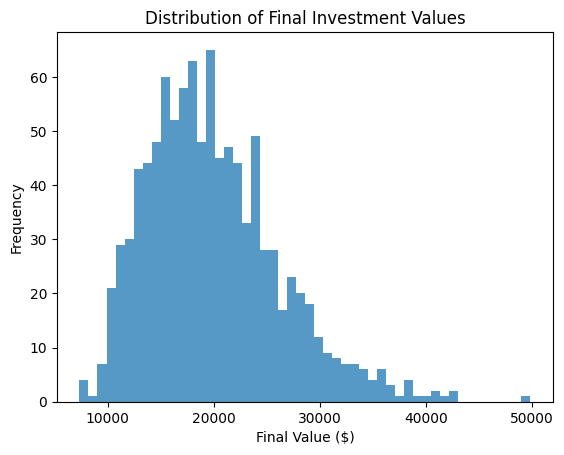

In [36]:
# Convert results to a NumPy array for further analysis
final_returns_np = np.array(final_returns)
# Calculate the mean ending value from all simulations
mean_final_return = np.mean(final_returns_np)
print(f"Mean Final Return after {years} years: ${mean_final_return:.2f}")
# Plotting the distribution of final returns
plt.hist(final_returns_np, bins=50, alpha=0.75)
plt.title('Distribution of Final Investment Values')
plt.xlabel('Final Value ($)')
plt.ylabel('Frequency')
plt.show()

Using Dask for Monte Carlo simulations enhances the ability to scale the computations across multiple cores or even across clusters of machines. This scalability is particularly useful for extensive simulations or when handling large datasets that exceed the memory capacity of a single machine. Dask's integration with Python's data science stack makes it a powerful tool for parallel computations, significantly speeding up processing times and enabling more complex analyses.

What applications can you see for monte carlo simulations in your workplace?